In [1]:
import pandas as pd
import numpy as np

#### Analysis of FiveThirtyEight Data on Unisex names

In [25]:
names = pd.read_csv("unisex_names_table.csv")

In [26]:
names.head()

,Unnamed: 0,name,total,male_share,female_share,gap
0,1,Casey,176544.328149,0.584287,0.415713,0.168573
1,2,Riley,154860.665173,0.507639,0.492361,0.015278
2,3,Jessie,136381.830656,0.477834,0.522166,0.044331
3,4,Jackie,132928.788740,0.421133,0.578867,0.157735
4,5,Avery,121797.419516,0.335213,0.664787,0.329574


In [27]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 6 columns):
Unnamed: 0      919 non-null int64
name            919 non-null object
total           919 non-null float64
male_share      919 non-null float64
female_share    919 non-null float64
gap             919 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 43.2+ KB


In [29]:
names.drop("Unnamed: 0", inplace = True, axis=1)

In [30]:
names.sort_values("gap", ascending=False).head()

,name,total,male_share,female_share,gap
639,Aldean,262.841418,0.333561,0.666439,0.332879
667,Oluwaseyi,237.927401,0.666278,0.333722,0.332555
698,Kamarri,217.436651,0.666259,0.333741,0.332519
756,Vernis,172.896311,0.666205,0.333795,0.332409
565,Karem,345.429988,0.333961,0.666039,0.332078


In [31]:
names[(names["gap"] < 0.002)]

,name,total,male_share,female_share,gap
108,Camdyn,3274.913501,0.499923,0.500077,0.000154
431,Kodee,533.325804,0.500158,0.499842,0.000316
609,Callaway,291.851857,0.499772,0.500228,0.000455
622,Bless,279.904057,0.499964,0.500036,0.000072
714,Nike,205.592726,0.499609,0.500391,0.000782
814,Tkai,142.846541,0.499715,0.500285,0.000570


In [19]:
def starts_with(letter):
    name_list = []
    for name in names["name"]:
        if name[:len(letter)] == letter:
            name_list.append(name)
    return name_list

In [38]:
starting_letter_counts = {}

for letter in "ABCDEFGHIJKLMNOPQRSTUVWXYZ":
    count = len(starts_with(letter))
    starting_letter_counts[letter] = count

In [42]:
starting_letter_counts

{'A': 101,
 'B': 37,
 'C': 65,
 'D': 63,
 'E': 30,
 'F': 8,
 'G': 19,
 'H': 20,
 'I': 5,
 'J': 79,
 'K': 81,
 'L': 55,
 'M': 61,
 'N': 16,
 'O': 27,
 'P': 18,
 'Q': 2,
 'R': 62,
 'S': 68,
 'T': 56,
 'U': 1,
 'V': 11,
 'W': 7,
 'X': 1,
 'Y': 15,
 'Z': 11}

In [62]:
def ends_with(letter):
    name_list = []
    for name in names["name"]:
        if name[-1*len(letter):] == letter:
            name_list.append(name)
    return name_list

In [63]:
ending_letter_counts = {}

for letter in "ABCDEFGHIJKLMNOPQRSTUVWXYZ".lower():
    count = len(ends_with(letter))
    ending_letter_counts[letter] = count

In [69]:
ending_letter_counts

{'a': 56,
 'b': 0,
 'c': 1,
 'd': 7,
 'e': 174,
 'f': 0,
 'g': 5,
 'h': 36,
 'i': 96,
 'j': 1,
 'k': 2,
 'l': 66,
 'm': 16,
 'n': 256,
 'o': 9,
 'p': 4,
 'q': 0,
 'r': 32,
 's': 32,
 't': 17,
 'u': 3,
 'v': 0,
 'w': 1,
 'x': 6,
 'y': 94,
 'z': 5}

In [71]:
print(ends_with("ey"))

['Casey', 'Riley', 'Harley', 'Carey', 'Charley', 'Mckinley', 'Finley', 'Ryley', 'Torey', 'Oakley', 'Berkley', 'Berkeley', 'Chancey', 'Hartley', 'Finnley', 'Ramey', 'Reiley', 'Avrey', 'Atley', 'Mackinley', 'Corley', 'Averey', 'Halsey', 'Cheney', 'Rieley', 'Wrigley', 'Cagney', 'Reilley', 'Shey', 'Romey', 'Staley', 'Posey', 'Yardley', 'Chey', 'Rorey', 'Jodey', 'Rilley']


#### Analysis of Social Security Name data by Year

In [74]:
import os, csv

In [78]:
os.chdir("names")

In [239]:
yr1880 = np.genfromtxt("yob1880.txt",delimiter="\n",dtype="str")

In [240]:
yr1880 = np.array([row.split(",") for row in yr1880])

In [241]:
index = np.array([item[0] for item in yr1880])
columns = np.array([item[1:] for item in yr1880])

In [242]:
df1880 = pd.DataFrame(data = columns, index = index, columns=["sex","count"])

In [243]:
df1880["count"] = df1880["count"].apply(int)    

In [244]:
df1880.head()

,sex,count
Mary,F,7065
Anna,F,2604
Emma,F,2003
Elizabeth,F,1939
Minnie,F,1746


In [200]:
def create_dataframe(year):
    yr = np.genfromtxt("yob"+str(year)+".txt",delimiter="\n", dtype='str')
    yr = np.array([row.split(",") for row in yr])
    index = np.array([item[0] for item in yr])
    columns = np.array([item[1:] for item in yr])
    df = pd.DataFrame(data = columns, index = index, columns=["sex","count"])
    df['count'] = df['count'].apply(int)
    return df

In [202]:
df1986 = create_dataframe(1986)

In [310]:
df1986.loc["Devin"]

,sex,count
Devin,F,465
Devin,M,2445


In [225]:
def unisex_names(df):
    names = set()

    for name,count in df.index.value_counts().to_dict().items():
        if count == 2:
            names.add(name)
    
    unisex_qualified = []
    
    for name in names:
        name_df = df.loc[name]
        total_count = name_df["count"].sum()
        male_count = name_df[name_df["sex"] == 'M']["count"].sum()
        female_count = name_df[name_df["sex"] == 'F']["count"].sum()
        if total_count > 100:
            if (male_count/total_count > .33) and (female_count/total_count > .33):
                unisex_qualified.append(name)
    return unisex_qualified


In [227]:
len(unisex_names(df1986))

34

In [234]:
def unisex_name_percentage(df):
    total_names = df["count"].sum()
    total_unisex = df.loc[unisex_names(df)]["count"].sum()
    return str(round(total_unisex/total_names * 100,2))+"%"

In [245]:
unisex_name_percentage(df1880)

'0.15%'

In [248]:
unisex_name_counts = {}
unisex_name_df = {}
unisex_name_percentages = {}
all_unisex_names = []

for year in range(1880,2017):
    if year%10 == 0:
        print('analyzing '+str(year)+"'s")
        
    df = create_dataframe(year)
    unisex_name_df[year] = df
    unisex_list = unisex_names(df)
    for name in unisex_list:
        if name not in all_unisex_names:
            all_unisex_names.append(name)
    unisex_name_counts[year] = len(unisex_list)
    unisex_name_percentages[year] = unisex_name_percentage(df)
    
    
    

analyzing 1880's
analyzing 1890's
analyzing 1900's
analyzing 1910's
analyzing 1920's
analyzing 1930's
analyzing 1940's
analyzing 1950's
analyzing 1960's
analyzing 1970's
analyzing 1980's
analyzing 1990's
analyzing 2000's
analyzing 2010's


In [309]:
print(all_unisex_names)

['Marion', 'Willie', 'Johnnie', 'Cecil', 'Alva', 'Merle', 'Jimmie', 'Tommie', 'Freddie', 'Odell', 'Guadalupe', 'Patsy', 'Theo', 'Beverly', 'Sammie', 'Augustine', 'Vernie', 'Arlie', 'Gail', 'Lavern', 'Claudie', 'Dana', 'Garnett', 'Meredith', 'Odie', 'Gayle', 'Maxie', 'Carmen', 'Myrl', 'Donnie', 'Trinidad', 'Golden', 'Ivory', 'Terry', 'Jonnie', 'Valentine', 'Carmel', 'Santos', 'Laurel', 'Bobby', 'Audie', 'Dell', 'Jamie', 'Cruz', 'Ocie', 'Ardell', 'Billie', 'Lorenza', 'Mickey', 'Ossie', 'Burnice', 'Jackie', 'Jessie', 'Bobbie', 'Pat', 'Marlyn', 'Ivy', 'Merlyn', 'Allison', 'Refugio', 'Cleo', 'Dee', 'Robin', 'Arden', 'Artie', 'Rosario', 'Sydney', 'Frankie', 'Kaye', 'Lynn', 'Gerry', 'Jan', 'Toby', 'Carrol', 'Laurie', 'Gale', 'Sherrill', 'Sandy', 'Shelby', 'Shannon', 'Lesley', 'Ollie', 'Leigh', 'Barrie', 'Tracy', 'Kim', 'Marty', 'Leslie', 'Lavon', 'Lauren', 'Kerry', 'Rickie', 'Sheridan', 'Lennie', 'Kris', 'Stacy', 'Unknown', 'Lindsay', 'Jodie', 'Terrill', 'Rory', 'Jody', 'Darnell', 'Hilary', '

In [253]:
in_other_set = [name for name in names["name"] if name not in all_unisex_names]

722

In [163]:
import matplotlib.pyplot as plt
%matplotlib inline

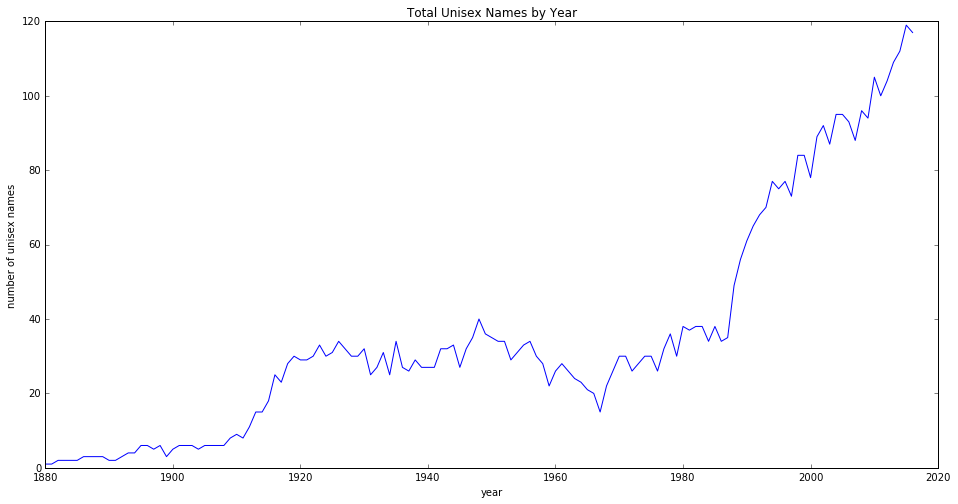

In [293]:
fig1 = plt.figure(figsize=(16,8))
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(list(unisex_name_counts.keys()),list(unisex_name_counts.values()))
ax1.set_xlabel("year")
ax1.set_ylabel("number of unisex names")
plt.title("Total Unisex Names by Year")

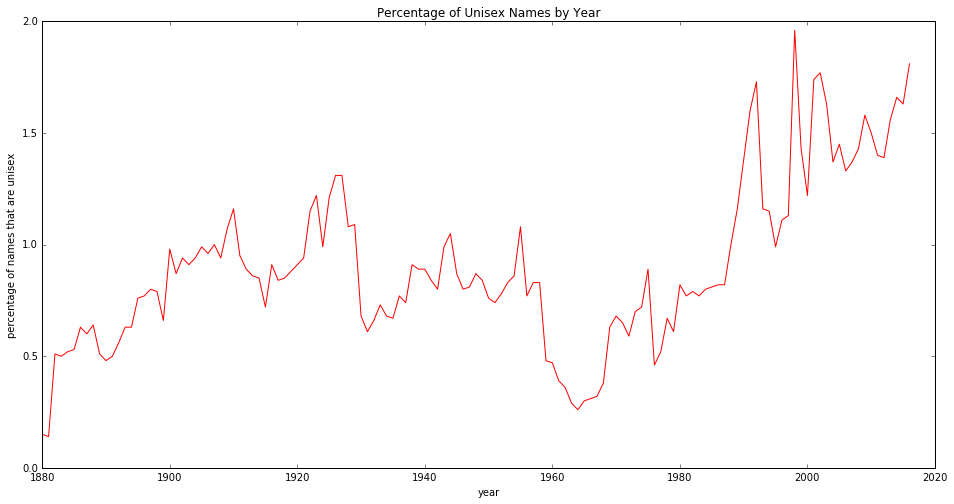

In [290]:
fig2 = plt.figure(figsize=(16,8))
ax2 = fig2.add_subplot(1,1,1)
ax2.plot(list(unisex_name_percentages.keys()),[float(n[:-1]) for n in unisex_name_percentages.values()],c='red')
ax2.set_xlabel("year")
ax2.set_ylabel("percentage of names that are unisex")
plt.title("Percentage of Unisex Names by Year")

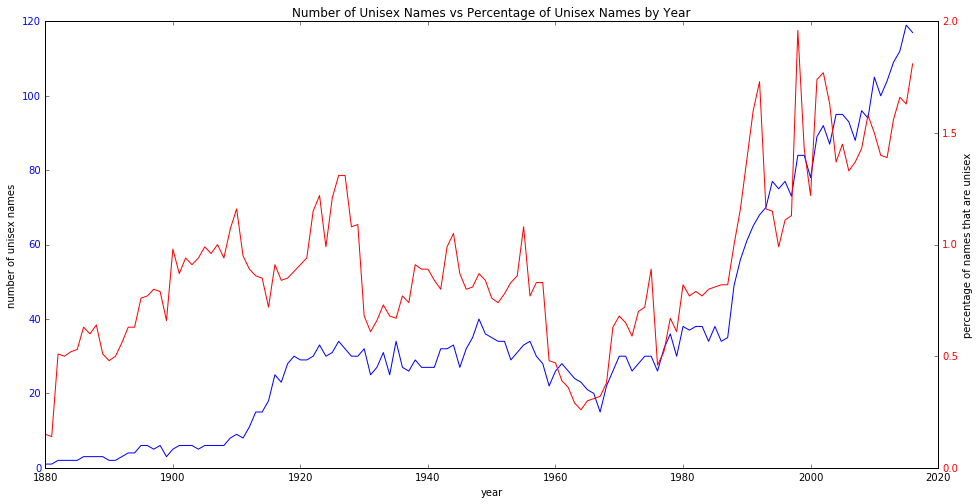

In [307]:
def two_scales(ax1, time, data1, data2, c1, c2):

    ax2 = ax1.twinx()

    ax1.plot(time, data1, color=c1)
    ax1.set_xlabel('year')
    ax1.set_ylabel('number of unisex names')

    ax2.plot(time, data2, color=c2)
    ax2.set_ylabel('percentage of names that are unisex')
    return ax1, ax2


# Create some mock data
t = list(unisex_name_percentages.keys())
s1 = list(unisex_name_counts.values())
s2 = [float(n[:-1]) for n in unisex_name_percentages.values()]

# Create axes
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
ax1, ax2 = two_scales(ax, t, s1, s2, 'b', 'r')


# Change color of each axis
def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None
color_y_axis(ax1, 'b')
color_y_axis(ax2, 'r')

plt.title("Number of Unisex Names vs Percentage of Unisex Names by Year")